# Capstone Project - The Battle of Neighbourhoods

## (Best Neighbourhood in Scarborough)

In [1]:
import pandas as pd
import requests 
import numpy as np

In [2]:
!pip install geocoder
!pip install folium

     |████████████████████████████████| 98 kB 7.1 MB/s  eta 0:00:01
     |████████████████████████████████| 94 kB 5.4 MB/s  eta 0:00:01


## Data Extracting and cleaning

In [3]:
page = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
wiki_url = requests.get(page)
wiki_url

<Response [200]>

This shows that a connection was made to the page 

In [4]:
wiki_data = pd.read_html(wiki_url.text)
wiki_data

[    Postal Code           Borough  \
 0           M1A      Not assigned   
 1           M2A      Not assigned   
 2           M3A        North York   
 3           M4A        North York   
 4           M5A  Downtown Toronto   
 ..          ...               ...   
 175         M5Z      Not assigned   
 176         M6Z      Not assigned   
 177         M7Z      Not assigned   
 178         M8Z         Etobicoke   
 179         M9Z      Not assigned   
 
                                          Neighbourhood  
 0                                         Not assigned  
 1                                         Not assigned  
 2                                            Parkwoods  
 3                                     Victoria Village  
 4                            Regent Park, Harbourfront  
 ..                                                 ...  
 175                                       Not assigned  
 176                                       Not assigned  
 177                

We need to drop every table other that the first one 

In [5]:
len(wiki_data), type(wiki_data)

(3, list)

In [6]:
wiki_data = wiki_data[0]
wiki_data

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


We don't need Not assigned values. So we need to drop them. And then create the dataframe.

In [7]:
df = wiki_data[wiki_data["Borough"]!= "Not assigned"]
df

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Now to group the records based on Postal code

In [8]:
df = df.groupby(['Postal Code']).head()
df

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Checking if a cell has a borough but a Not assigned  neighborhood

In [9]:
df.Neighbourhood.str.count("Not assigned").sum()

0

In [10]:
df = df.reset_index()
df

,index,Postal Code,Borough,Neighbourhood
0,2,M3A,North York,Parkwoods
1,3,M4A,North York,Victoria Village
2,4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,5,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...,...
98,160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,165,M4Y,Downtown Toronto,Church and Wellesley
100,168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [11]:
df.drop(['index'], axis='columns', inplace=True)
df

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [12]:
df.shape

(103, 3)

In [13]:
geo_data = pd.read_csv("https://cocl.us/Geospatial_data")
geo_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [14]:
print("The shape of our wiki and csv data is: ", df.shape, geo_data.shape)

The shape of our wiki and csv data is:  (103, 3) (103, 3)


Because of the same dimensions of both we can join on the postal codes to get the required data.
We need to check Postal code datatypes.

In [15]:
df.dtypes

Postal Code      object
Borough          object
Neighbourhood    object
dtype: object

In [16]:
geo_data.dtypes

Postal Code     object
Latitude       float64
Longitude      float64
dtype: object

In [17]:
c_data = df.join(geo_data.set_index('Postal Code'), on='Postal Code', how='inner')
c_data

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [18]:
c_data.shape

(103, 5)

In [19]:
c_data.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


## Scarborough Map

In [20]:
from geopy.geocoders import Nominatim

In [21]:
address = 'Scarborough,Toronto'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Toronto\nLatitudes: {}\nLongitudes: {}.'.format(latitude, longitude))

Toronto
Latitudes: 43.7729744
Longitudes: -79.2576479.


In [22]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [23]:
import folium

Creting the map of Scarborough

In [25]:
Toronto_map = folium.Map(location=[latitude, longitude], zoom_start=10)

Adding markers to the map

In [26]:
for latitude, longitude, borough, neighbourhood in zip(c_data['Latitude'], c_data['Longitude'], c_data['Borough'], c_data['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='red',
        fill=True
        ).add_to(Toronto_map)  
    
Toronto_map

Saving Foursquare API credentials

## Nearby venues/location

In [28]:
# @hiddel_cell
CLIENT_ID = 'WPXX4HUCHDHQ10KRSBGQSKQRN1N4JBQJS1KARMSZALZG1NBB' 
CLIENT_SECRET = 'TJQGNQEPFDLQFX3ENSWLWDWQLCGX3LMJBYYERRG54PNQWQGG'
VERSION = '20180605' 

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: WPXX4HUCHDHQ10KRSBGQSKQRN1N4JBQJS1KARMSZALZG1NBB
CLIENT_SECRET:TJQGNQEPFDLQFX3ENSWLWDWQLCGX3LMJBYYERRG54PNQWQGG


Now the following function gets all the venue categories in Toronto.

In [29]:
def NearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, longt in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            longt, 
            radius
            )
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            longt, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearbyVenues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearbyVenues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearbyVenues)

In [31]:
toronto_venues = NearbyVenues(c_data['Neighbourhood'], c_data['Latitude'], c_data['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [32]:
toronto_venues.shape

(1324, 5)

We have 1325 records and 5 columns

In [33]:
toronto_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,Coffee Shop


In [34]:
toronto_venues.groupby("Neighbourhood").head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,Coffee Shop
...,...,...,...,...,...
1311,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Wingporium,Wings Joint
1312,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,South St. Burger,Burger Joint
1313,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Dollarama,Discount Store
1314,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Healthy Planet,Supplement Shop


There are 413 unique Categories

Now to check for maximum number of venue categories.

In [35]:
toronto_venues.groupby('Venue Category').max()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue
Venue Category,,,,
Accessories Store,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Ardene Shoes Outlet
Airport,Downsview,43.737473,-79.394420,Toronto Downsview Airport (YZD)
Airport Food Court,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,Billy Bishop Café
Airport Gate,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,Gate 8
Airport Lounge,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,Porter Lounge
...,...,...,...,...
Warehouse Store,Thorncliffe Park,43.705369,-79.349372,Costco
Wine Bar,"Toronto Dominion Centre, Design Exchange",43.653206,-79.379817,The National Club
Wings Joint,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Wingporium


There are 235 different types of venue categories.

## One Hot Encoding

In [36]:
toronto_venue_cat = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_venue_cat

,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adding the neighbourhood to the encoded dataframe

In [38]:
toronto_venue_cat['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# moving neighborhood column to the first column
fixed_columns = [toronto_venue_cat.columns[-1]] + list(toronto_venue_cat.columns[:-1])
toronto_venue_cat = toronto_venue_cat[fixed_columns]

toronto_venue_cat.head()

,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
toronto_grouped = toronto_venue_cat.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
num_top_venues = 5
for hood in toronto_grouped['Neighbourhood']:
    print("---- "+hood+" ----")
    temp =toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Agincourt ----
                       venue  freq
0                     Lounge  0.25
1             Breakfast Spot  0.25
2  Latin American Restaurant  0.25
3         Chinese Restaurant  0.25
4          Accessories Store  0.00


---- Alderwood, Long Branch ----
            venue  freq
0     Pizza Place  0.29
1    Skating Rink  0.14
2     Coffee Shop  0.14
3             Pub  0.14
4  Sandwich Place  0.14


---- Bathurst Manor, Wilson Heights, Downsview North ----
                       venue  freq
0                Coffee Shop  0.10
1                       Bank  0.10
2                 Restaurant  0.05
3  Middle Eastern Restaurant  0.05
4              Shopping Mall  0.05


---- Bayview Village ----
                 venue  freq
0                 Café  0.25
1   Chinese Restaurant  0.25
2                 Bank  0.25
3  Japanese Restaurant  0.25
4    Accessories Store  0.00


---- Bedford Park, Lawrence Manor East ----
                venue  freq
0  Italian Restaurant  0.10
1      Sandwich P

In [44]:
def common_venues(row, num_top_venues):
    row_cat = row.iloc[1:]
    row_cat_sorted = row_cat.sort_values(ascending=False)
    
    return row_cat_sorted.index.values[0:num_top_venues]

### Most common venues nearby

In [45]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
n_venues_sorted = pd.DataFrame(columns=columns)
n_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    n_venues_sorted.iloc[ind, 1:] = common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

n_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Breakfast Spot,Chinese Restaurant,Lounge,Yoga Studio,Dessert Shop,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Gym,Skating Rink,Sandwich Place,Pub,Yoga Studio,Dim Sum Restaurant,Department Store,Dessert Shop
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Middle Eastern Restaurant,Chinese Restaurant,Bridal Shop,Sandwich Place,Diner,Restaurant,Intersection,Deli / Bodega
3,Bayview Village,Café,Chinese Restaurant,Bank,Japanese Restaurant,Department Store,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Coffee Shop,Italian Restaurant,Grocery Store,Thai Restaurant,Juice Bar,Indian Restaurant,Restaurant,Butcher,Sushi Restaurant


## K-means clustering

In [46]:
from sklearn.cluster import KMeans

In [47]:
k_num_clusters = 5
toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

kmeans = KMeans(n_clusters=k_num_clusters, random_state=0).fit(toronto_grouped_clustering)
kmeans

KMeans(n_clusters=5, random_state=0)

In [48]:
kmeans.labels_[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4,
       0, 1, 0, 0, 0, 0, 1, 0], dtype=int32)

In [49]:
n_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [50]:
toronto_merged = c_data
toronto_merged = toronto_merged.join(n_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1.0,Park,Food & Drink Shop,Yoga Studio,Deli / Bodega,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,Portuguese Restaurant,Hockey Arena,Intersection,French Restaurant,Coffee Shop,Drugstore,Donut Shop,Dog Run,Distribution Center,Deli / Bodega
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.0,Coffee Shop,Park,Bakery,Breakfast Spot,Café,Restaurant,Pub,Chocolate Shop,Performing Arts Venue,Dessert Shop
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.0,Clothing Store,Accessories Store,Boutique,Furniture / Home Store,Event Space,Coffee Shop,Women's Store,Vietnamese Restaurant,Airport Service,Dim Sum Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.0,Coffee Shop,Sushi Restaurant,Gym,Nightclub,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,Portuguese Restaurant


In [51]:
toronto_merged_nonan = toronto_merged.dropna(subset=['Cluster Labels'])

In [52]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [53]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
x = np.arange(k_num_clusters)
ys = [i + x + (i*x)**2 for i in range(k_num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged_nonan['Latitude'], toronto_merged_nonan['Longitude'], toronto_merged_nonan['Neighbourhood'], toronto_merged_nonan['Cluster Labels']):
    label = folium.Popup('Cluster ' + str(int(cluster) +1) + '\n' + str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)]
        ).add_to(map_clusters)
        
map_clusters

# -------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------

In [54]:
df1=toronto_merged_nonan.loc[toronto_merged_nonan['Cluster Labels'] == 0,toronto_merged_nonan.columns[[2] + list(range(5, toronto_merged_nonan.shape[1]))]]
df2=toronto_merged_nonan.loc[toronto_merged_nonan['Cluster Labels'] == 1,toronto_merged_nonan.columns[[2] + list(range(5, toronto_merged_nonan.shape[1]))]]
df3=toronto_merged_nonan.loc[toronto_merged_nonan['Cluster Labels'] == 2,toronto_merged_nonan.columns[[2] + list(range(5, toronto_merged_nonan.shape[1]))]]

In [55]:
Scarborough_Avg_HousingPrice=pd.DataFrame({"Neighborhood":c_data["Neighbourhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,229200.0,
                                                               229200.0,365000.0,388500.,285400.0,493500.0,477500.0,378000.0,316600.0,195000.0,225900.0,219400.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533500.0,279200.0,
                                                               279200.0,375000.0,370500.,255400.0,493500.0,433500.0,335000.0,286600.0,165000.0,225900.0,219400.0,
                                                               573900.0,425000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,195000.0,370500.,255400.0,403500.0,433500.0,335000.0,286600.0,187000.0,225900.0,219400.0,
                                                               573900.0,325000.0,370500.0,370500.0,333500.0,279200.0,
                                                               279200.0,289000.0,370500.,255400.0,413500.0,433500.0,254800.0
                                                              ]})

In [57]:
Scarborough_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

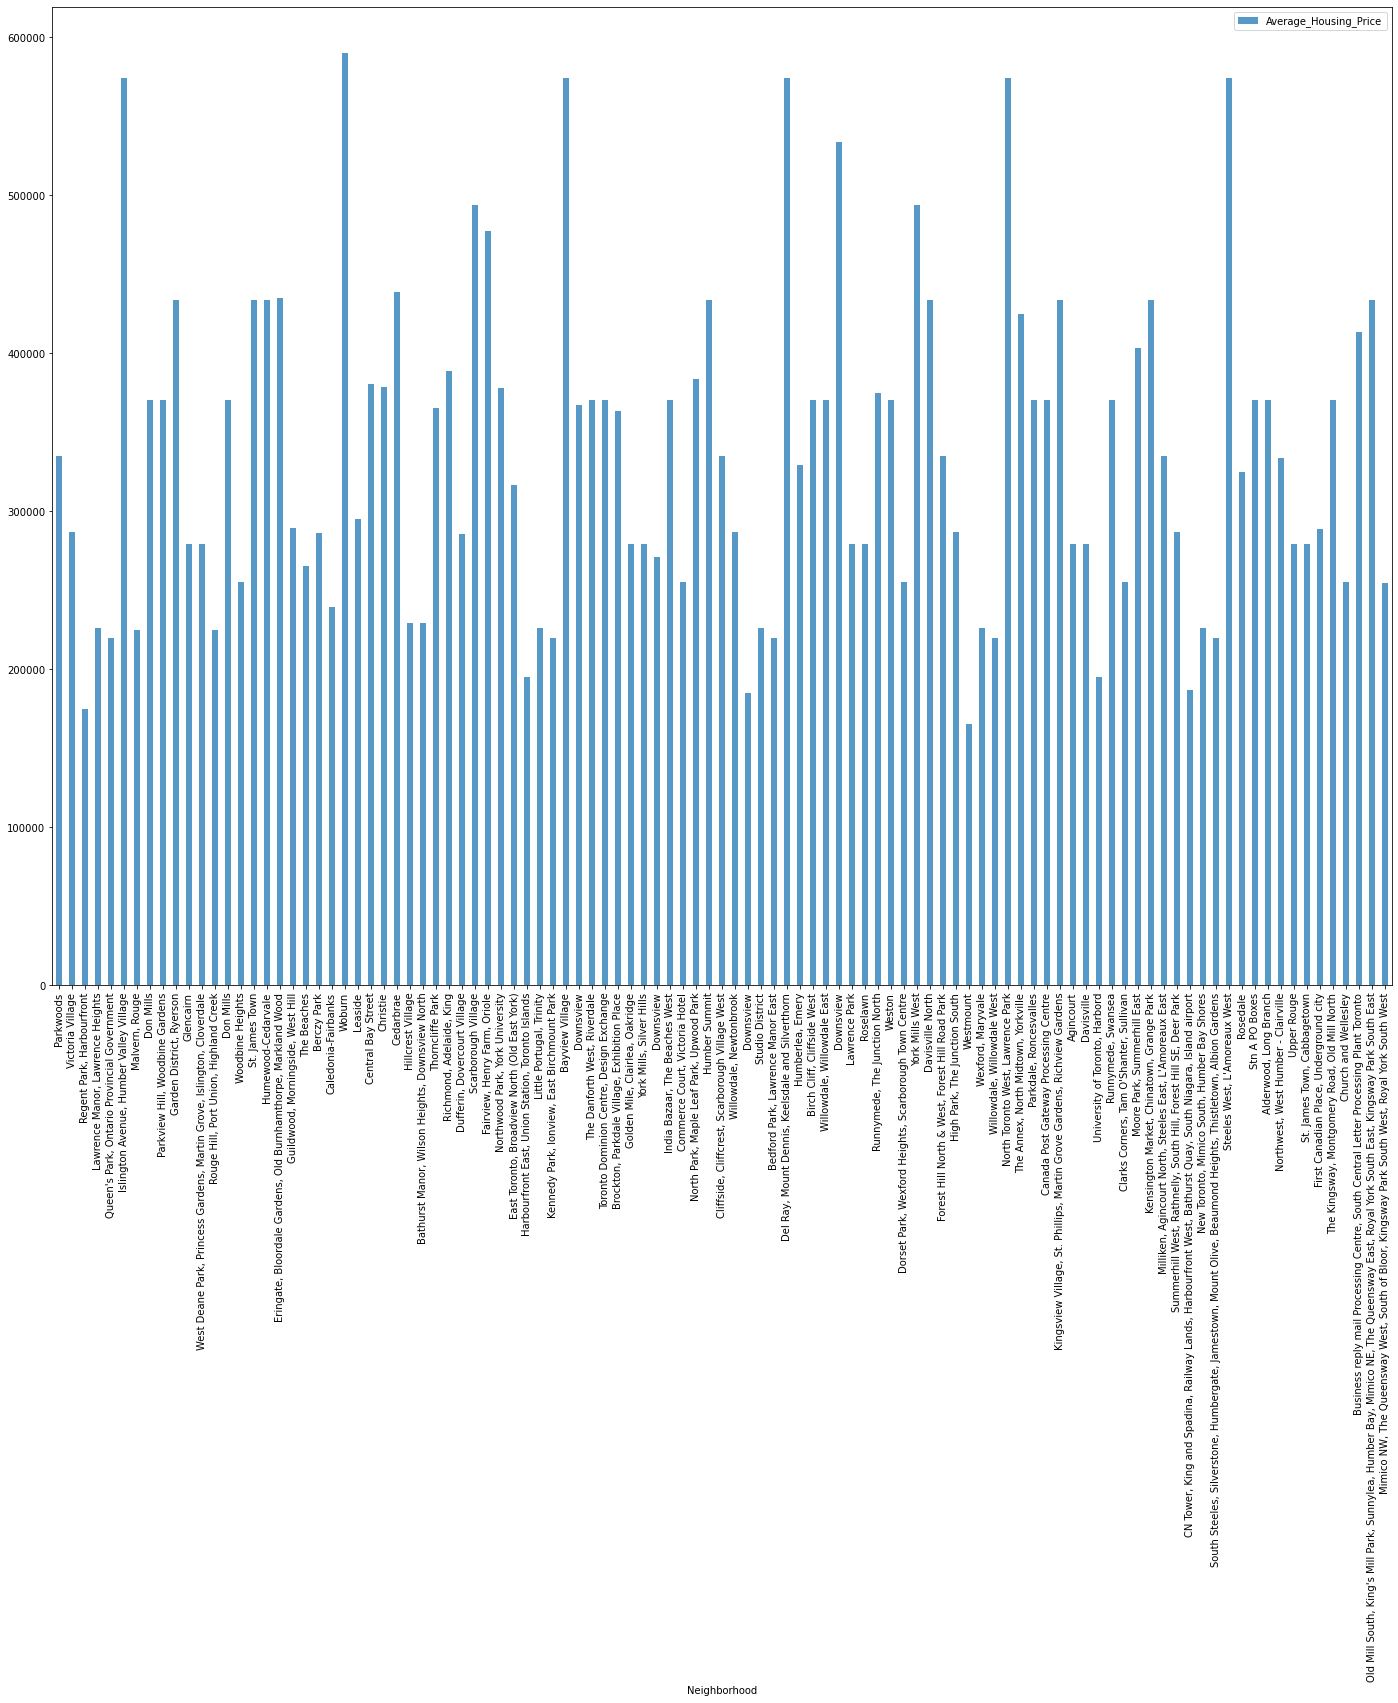

In [58]:
Scarborough_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

## School Rating clusters

In [60]:
clusters=pd.DataFrame({"Cluster1":df1["Neighbourhood"],
                      "Cluster2":df2["Neighbourhood"],
                      "Cluster4":df3["Neighbourhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

In [62]:
new_Scarborough=toronto_merged.set_index("Neighbourhood",drop=True)

Scarborough_school_ratings=pd.DataFrame({"Neighborhood":df["Neighbourhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,
                                                           10,2,5,8,9,6,6,10,8,9,1,2,3,4,5,6,9,
                                                           8,5,9,6,9,6,4,8,10,2,5,6,3,9,8,7,
                                                           7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,
                                                           4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7
                                                           ]})

In [63]:
Scarborough_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

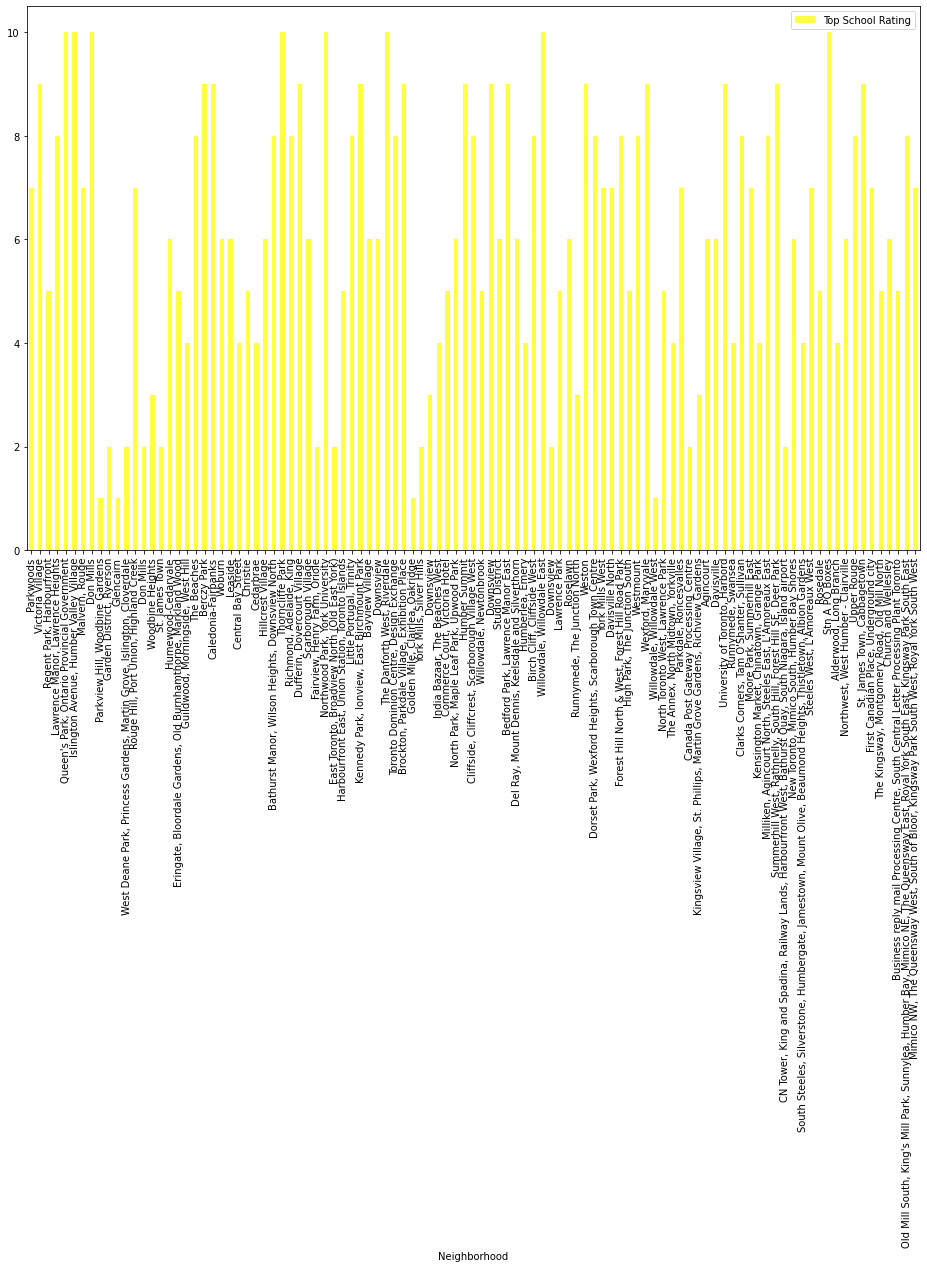

In [64]:
Scarborough_school_ratings.plot(kind='bar',figsize=(16,10),color='yellow',alpha=0.75);

### Conclusion:
I separated the neighborhood into 10 different clusters and for 103 different lattitude and logitude from dataset, which have very-similar neighborhoods around them, using k-means cluster algorithm. Using the charts above results presented to a particular neighborhood based on average house prices and school rating have been made.